Import necessary libraries and defining the plot default style values:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

Reading the graph...

In [5]:
GG = nx.read_graphml("drosophila_medulla_1.graphml")
GG = GG.to_undirected()

We compute here the number of nodes *N*, the number of edges *L*, the average number of nodes in and out relations *k_avg* and the mean probability *p* of a node of being connected with another one.

In [6]:
N = GG.number_of_nodes()
L = GG.number_of_edges()
k_avg = 2.0*L/N
p = k_avg/N

print(N)
print(L)
print(k_avg)
print(p)

1781
32377
36.3582257159
0.0204145006827


We need to define bins in order to compute the probability *p_k* of nodes to be degree *k*.

C:\Users\navar\Anaconda2\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


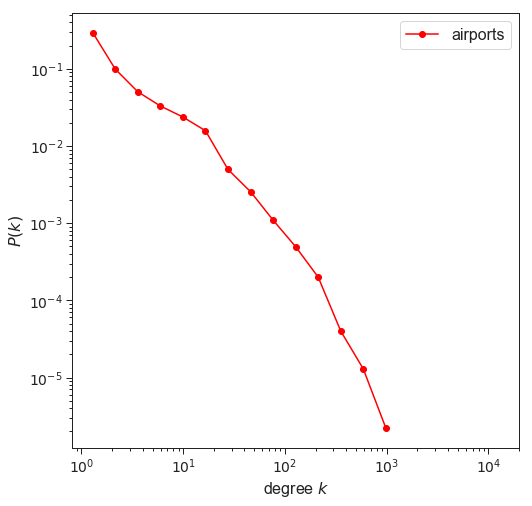

In [7]:
def log_bin(k, bins=20):
    k = np.array(k)
    k = k[k > 0]
    k_min = np.amin(k)
    k_max = np.amax(k)
    
    # Get bins logarithmically spaced bins between kmin and kmax
    bin_edges = np.logspace(np.log10(k_min), np.log10(k_max), num=bins)

    # histogram the data into these bins
    density, _ = np.histogram(k, bins=bin_edges, density=True)
    
    # "x" should be midpoint (IN LOG SPACE) of each bin
    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    
    return x, density

fig = plt.figure(figsize=(8, 8))

x, y = log_bin(list(GG.degree().values()))
plt.loglog(x, y, marker='o',  color='red', label='airports')

# label and create a legend
plt.legend()
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)